In [102]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import matplotlib
import seaborn as sns
import scipy.stats as sps

In [182]:
Mel=pd.Series([26, 35, 23, 27, 26, 25, 33, 26, 25, 29, 30, 28, 24, 28, 23, 21, 24, 32, 27, 23, 24, 24, 23, 31, 32, 35, 23, 23])

In [183]:
Syd=pd.Series([28, 28, 29, 29, 30, 27, 30, 25, 24, 25, 24, 29, 26, 28, 29, 31, 23, 26, 29, 31, 26, 27, 26, 27, 25, 29, 37, 25])

In [184]:
Mel.sort_values(inplace=True)
Syd.sort_values(inplace=True)
Mel.reset_index(drop=True, inplace=True)
Syd.reset_index(drop=True, inplace=True)

In [185]:
data=pd.concat([Mel, Syd], axis=1, join='outer')
data=data.rename(columns={
    0:"Melburn",
    1:"Sydney"
})
print(data)

    Melburn  Sydney
0        21      23
1        23      24
2        23      24
3        23      25
4        23      25
5        23      25
6        23      25
7        24      26
8        24      26
9        24      26
10       24      26
11       25      27
12       25      27
13       26      27
14       26      28
15       26      28
16       27      28
17       27      29
18       28      29
19       28      29
20       29      29
21       30      29
22       31      29
23       32      30
24       32      30
25       33      31
26       35      31
27       35      37


# Вывод без ограничений
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print("Мельбурн")
    print(Mel)
    print("Сидней")
    print(Syd)

In [186]:
df = pd.DataFrame({'Melbourne': Mel, 'Sydney': Syd})
df.describe()

,Melbourne,Sydney
count,28.000000,28.000000
mean,26.785714,27.607143
std,3.956777,2.858895
min,21.000000,23.000000
25%,23.750000,25.750000
50%,26.000000,27.500000
75%,29.250000,29.000000
max,35.000000,37.000000


In [187]:
Syd_fre = pd.DataFrame(df['Sydney'].value_counts())
Syd_fre

,Sydney
29,6
25,4
26,4
27,3
28,3
24,2
30,2
31,2
23,1
37,1


In [188]:
Mel_fre = pd.DataFrame(df['Melbourne'].value_counts())
Mel_fre

,Melbourne
23,6
24,4
26,3
25,2
27,2
28,2
32,2
35,2
21,1
29,1


In [189]:
df_freq = pd.DataFrame({'Values': list(set(Mel) | set(Syd))})
df_freq

,Values
0,21
1,23
2,24
3,25
4,26
5,27
6,28
7,29
8,30
9,31


In [190]:
Val_Mel = df_freq.merge(Mel_fre, left_on='Values', right_index=True, how='outer') # Объединяем левый DF(Val_Melb) по Values, а правый Df(Melbourne_fr) по индексу 
df_freq = Val_Mel.merge(Syd_fre, left_on='Values', right_index=True, how='outer') # Объединяем левый DF(Val_Melb) по Values, а правый Df(Sydney_fr) по индексу 
df_freq.set_index('Values',inplace=True) # Делаем индексом колонку "Values"
df_freq

,Melbourne,Sydney
Values,,
21,1.0,NaN
23,6.0,1.0
24,4.0,2.0
25,2.0,4.0
26,3.0,4.0
27,2.0,3.0
28,2.0,3.0
29,1.0,6.0
30,1.0,2.0


In [191]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

In [192]:
def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out',length=3, width=2, colors='k')# Ставит галочки внутри осей, вне осей, или оба.
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    #ax.set_xlabel('Sample name')

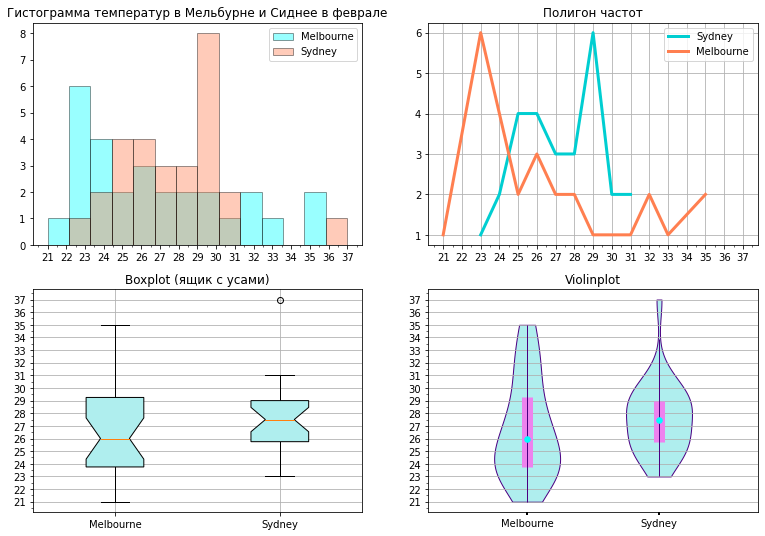

In [193]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(13, 9))
# Отобразим частотность температур в Мельбурне и Сиднее на одном графике (гистограмма)
axes[0, 0].hist(x=Mel, range=(df_freq.index.values.min(), df_freq.index.values.max()),
          alpha=0.4, bins=len(df_freq.index), color='cyan', edgecolor='black', label='Melbourne')
axes[0, 0].hist(x=Syd, range=(df_freq.index.values.min(), df_freq.index.values.max()),
          alpha=0.4, bins=len(df_freq.index), color='coral', edgecolor='black', label='Sydney')
axes[0, 0].set_title('Гистограмма температур в Мельбурне и Сиднее в феврале')
axes[0, 0].legend() # Выводим легенду
#  Устанавливаем интервал основных делений:
axes[0, 0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[0, 0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

#------------------------------------------------------------------------------
axes[0, 1].plot(df_freq.index.values, df_freq.Sydney.values, label = 'Sydney',color='darkturquoise',linewidth=3)
axes[0, 1].plot(df_freq.index.values, df_freq.Melbourne.values, label = 'Melbourne', color='coral',linewidth=3)

axes[0, 1].set_title('Полигон частот')
axes[0, 1].grid() # Добавим сетку
axes[0, 1].legend() # Выводим легенду
#  Устанавливаем интервал основных делений:
axes[0, 1].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[0, 1].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

#------------------------------------------------------------------------------
axes[1, 0].boxplot(x = [Mel, Syd], labels = ['Melbourne', 'Sydney'],notch=True, widths=0.35, patch_artist=True, boxprops=dict(facecolor="paleturquoise"))
# axes[1, 0].boxplot(Syd)

axes[1, 0].set_title('Boxplot (ящик с усами)')
axes[1, 0].grid() # Добавим сетку
#  Устанавливаем интервал основных делений:
axes[1, 0].yaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[1, 0].yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

#------------------------------------------------------------------------------
parts = axes[1, 1].violinplot(dataset = [Mel,Syd], points=100, widths=0.5, showmeans=False, showmedians=False,
        showextrema=False)
for pc in parts['bodies']:
    pc.set_facecolor('paleturquoise')
    pc.set_edgecolor('indigo')
    pc.set_alpha(1)


quartile1, medians, quartile3 = np.percentile(np.array(data.T), [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(np.array(data.T), quartile1, quartile3)])
whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]

inds = np.arange(1, len(medians) + 1)
axes[1, 1].scatter(inds, medians, marker='o', color='cyan', s=30, zorder=3)
axes[1, 1].vlines(inds, quartile1, quartile3, color='violet', linestyle='-', lw=11)
axes[1, 1].vlines(inds, whiskers_min, whiskers_max, color='indigo', linestyle='-', lw=1)

axes[1, 1].set_title('Violinplot')
axes[1, 1].grid(axis='y') # Добавим сетку
#  Устанавливаем интервал основных делений:
axes[1, 1].yaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[1, 1].yaxis.set_minor_locator(ticker.MultipleLocator(0.5))

set_axis_style(axes[1, 1], ['Melbourne', 'Sydney'])

In [197]:
df_freq['Melbourne_stat'] = df_freq['Melbourne']/len(df['Melbourne'])
df_freq['Sydney_stat'] = df_freq['Sydney']/len(df['Sydney'])

In [198]:
df_freq.fillna(0)

,Melbourne,Sydney,Melbourne_stat,Sydney_stat
Values,,,,
21,1.0,0.0,0.035714,0.000000
23,6.0,1.0,0.214286,0.035714
24,4.0,2.0,0.142857,0.071429
25,2.0,4.0,0.071429,0.142857
26,3.0,4.0,0.107143,0.142857
27,2.0,3.0,0.071429,0.107143
28,2.0,3.0,0.071429,0.107143
29,1.0,6.0,0.035714,0.214286
30,1.0,2.0,0.035714,0.071429


Эмпирическая функция распределения и камулятива распределения


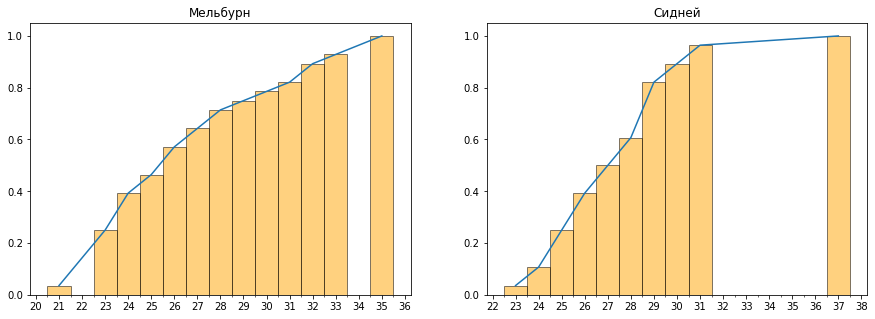

In [199]:
print('Эмпирическая функция распределения и камулятива распределения')
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 5))
axes[0].set_title('Мельбурн')
axes[0].bar(df_freq[~ df_freq['Melbourne'].isna()].index, df_freq.Melbourne_stat.cumsum().dropna(), width=1, edgecolor='black', alpha=0.5, color='orange' )
axes[0].plot(df_freq[~ df_freq['Melbourne'].isna()].index, df_freq.Melbourne_stat.cumsum().dropna())
#~ df_freq['Melbourne'].isna() - маска тех значений, которые присутствуют в ряде
#  Устанавливаем интервал основных делений:
axes[0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[0].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

axes[1].set_title('Сидней')
axes[1].bar(df_freq[~ df_freq['Sydney'].isna()].index, df_freq.Sydney_stat.cumsum().dropna(), width=1, edgecolor='black', alpha=0.5, color='orange' )
axes[1].plot(df_freq[~ df_freq['Sydney'].isna()].index, df_freq.Sydney_stat.cumsum().dropna())
#  Устанавливаем интервал основных делений:
axes[1].xaxis.set_major_locator(ticker.MultipleLocator(1))
#  Устанавливаем интервал вспомогательных делений:
axes[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.5))

In [43]:
# Считаем частоту вхождения вручную
def Stat_seq(data):
    return pd.DataFrame({"frequency": [len(data[data==data.unique()[i]]) for i in range(0,len(data.unique()))] }, index=data.unique())

In [147]:
def plot_empirical_cdf(sample):
    hist, edges = np.histogram(sample, bins=len(sample))
    Y = hist.cumsum()
    for i in range(len(Y)):
        plt.plot([edges[i], edges[i+1]],[Y[i], Y[i]], c="blue")
    plt.show()

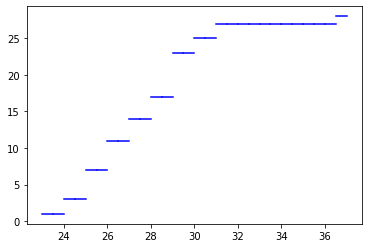

In [148]:
plot_empirical_cdf(data1) #функция распределения

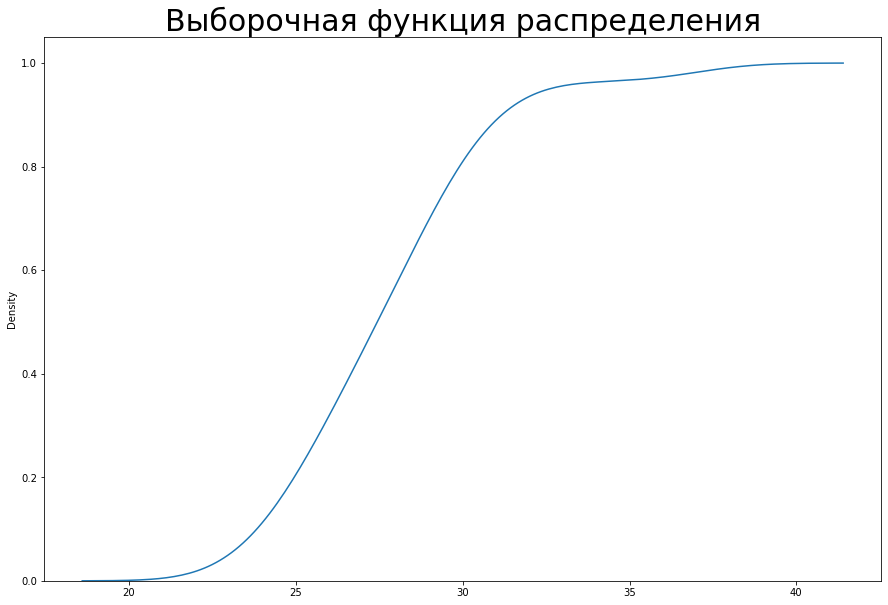

In [149]:
plt.figure(figsize=(15,10))
sns.kdeplot(data1, cumulative=True)
plt.title('Выборочная функция распределения', fontsize=30)
plt.show()

<Figure size 200x150 with 0 Axes>

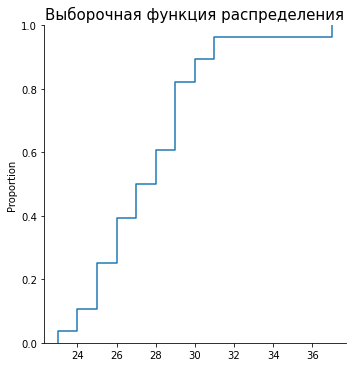

In [150]:
plt.figure(figsize=(20,15), dpi= 10)
sns.displot(
            kind="ecdf",
            data=data1);
plt.title('Выборочная функция распределения', fontsize=15)
plt.show()

Выборочное математическое ожидание(выборочное среднее)
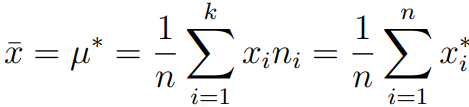
Выборочная дисперсия
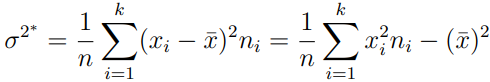
Исправленная(несмещенная) выборочная дисперсия
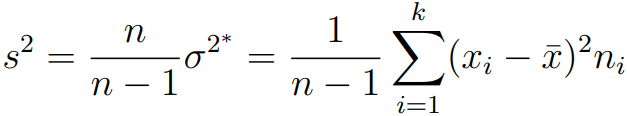
Мода - наиболее часто встречающееся значение в выборке
Медиана - значение, которое делит распределение пополам
Межквартильный размах: Q_3 - Q_1
Эмпирическая функция распределения
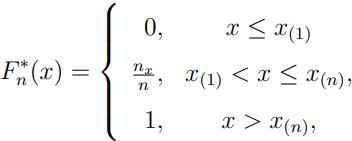

In [152]:
print('Выборочное среденее: %.3f' % data1.mean())
print('Выборочная дисперсия: %.3f' % data1.var())

Выборочное среденее: 27.607
Выборочная дисперсия: 8.173


In [67]:
def Выборочное_среднее(data):
    return sum(data)/len(data)

In [68]:
def Выборочная_дисперсия(data):
    return sum(data.copy().map(lambda x: x**2))/len(data) - (sum(data)/len(data))**2

In [69]:
def Исправленная_выборочная_дисперсия(data):
    M=(sum(data)/len(data)) #выборочное мат ожидание
    return sum(data.copy().map(lambda x: (x-M)**2))/(len(data)-1)

In [70]:
print('Выборочное среденее для Мельбурна: %.3f' % Выборочное_среднее(Mel))
print('Выборочное среденее для Сиднея: %.3f' % Выборочное_среднее(Syd))

Выборочное среденее для Мельбурна: 26.786
Выборочное среденее для Сиднея: 27.607


In [71]:
print('Выборочная дисперсия для Мельбурна: %.3f' % Выборочная_дисперсия(Mel))
print('Выборочная дисперсия для Сиднея: %.3f' % Выборочная_дисперсия(Syd))

Выборочная дисперсия для Мельбурна: 15.097
Выборочная дисперсия для Сиднея: 7.881


In [72]:
print('Исправленная выборочная дисперсия для Мельбурна: %.3f' % Исправленная_выборочная_дисперсия(Mel))
print('Исправленная выборочная дисперсия для Сиднея: %.3f' % Исправленная_выборочная_дисперсия(Syd))

Исправленная выборочная дисперсия для Мельбурна: 15.656
Исправленная выборочная дисперсия для Сиднея: 8.173


In [73]:
print('Стандартное отклонение для Мельбурна: %.3f' % np.sqrt(Исправленная_выборочная_дисперсия(Mel)))
print('Стандартное отклонение для Сиднея: %.3f' % np.sqrt(Исправленная_выборочная_дисперсия(Syd)))

Стандартное отклонение для Мельбурна: 3.957
Стандартное отклонение для Сиднея: 2.859
